# Creating Networks
This supplementary notebook demonstrates how to create a network from an edge list (and potentially a node list).  
When asked to create a network yourself, the idea is that you create the necessary CSV file(s) manually (rather than based on random data as we do below) and then proceed as described in `Let's read in the data`.

In [1]:
%run helper.py

In [2]:
import networkx as nx

### Let's create some dummy data and save it as a CSV file
In detail, we:
1. Seed our random number generator
2. Randomly draw edges, edge weights, and node colors
3. Create a DataFrame to represent the edges and saving it to CSV
4. Create a DataFrame to represent the nodes and saving it to CSV

In [3]:
rng = np.random.default_rng(42)

In [4]:
edges = rng.choice(range(1,17), size=(20,2), replace=True)
weight = rng.choice(range(1,4), size=(20,1), replace=True)
colors = rng.choice(range(3), size=(16,1), replace=True)

In [5]:
edge_df = pd.DataFrame(edges, columns=["node1", "node2"])
edge_df["weight"] = weight
# let's filter out self-loops
edge_df.query("node1 != node2").to_csv("../data/toy-edges.csv", index=False)

In [6]:
node_df = pd.DataFrame(colors, columns=["color"])
node_df["node"] = list(range(1,17))
node_df[["node","color"]].to_csv("../data/toy-nodes.csv", index=False)

### Let's read in the data

In [7]:
edge_df = pd.read_csv("../data/toy-edges.csv")
edge_df

,node1,node2,weight
0,2,13,2
1,11,8,1
2,7,14,3
3,2,12,3
4,4,2,3
5,9,16,3
6,12,13,2
7,12,13,3
8,9,3,2
9,14,8,1


In [8]:
node_df = pd.read_csv("../data/toy-nodes.csv")
node_df

,node,color
0,1,0
1,2,2
2,3,2
3,4,1
4,5,0
5,6,2
6,7,1
7,8,2
8,9,2
9,10,2


### Let's put it into a graph
In detail, we:
1. Create an undirected graph object
2. Add nodes to the graph along with node attributes
3. Add edges to the graph along with edge attributes (only adding edges also works but adding nodes separately will be necessary if you have nodes that are not connected to any of the other nodes)

If you are confused about the list comprehensions, you can also add the nodes or edges first and then set the attributes later, using `nx.set_{node|edge}_attributes`.

In [9]:
G = nx.Graph()
G.add_nodes_from([(n, dict(color=c)) for n,c in zip(node_df.node, node_df.color)])
G.add_edges_from([(u,v, dict(weight=w)) for u,v,w in zip(edge_df.node1, edge_df.node2, edge_df.weight)])

### Let's draw the graph

To do this, it helps to know how to get the attributes out of the graph (you can also assign them from the DataFrames directly but that risks messing up the ordering). You can do this with the `{Node|Edge}DataView` idiom, demonstrated below.

In [10]:
G.nodes(data="color")

NodeDataView({1: 0, 2: 2, 3: 2, 4: 1, 5: 0, 6: 2, 7: 1, 8: 2, 9: 2, 10: 2, 11: 2, 12: 0, 13: 1, 14: 1, 15: 1, 16: 0}, data='color')

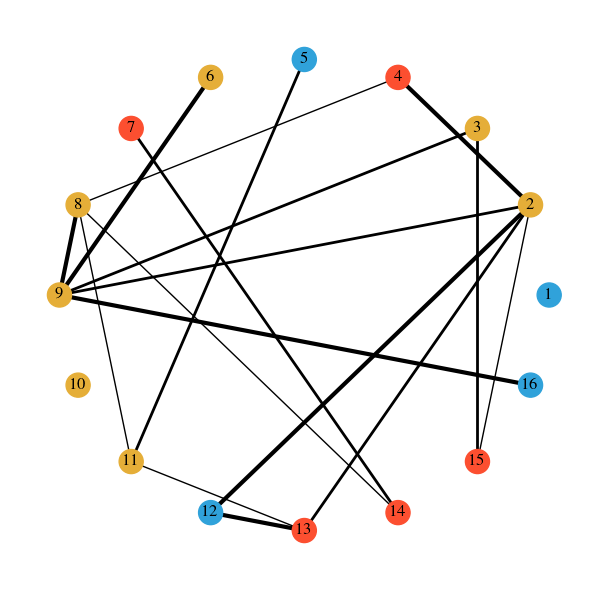

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, node_color=[cc.glasbey_hv[c] for _, c in G.nodes(data="color")], ax=ax, pos=pos)
nx.draw_networkx_labels(G, ax=ax, pos=pos)
nx.draw_networkx_edges(G, ax=ax, pos=pos, width=[w for _, _, w in G.edges(data="weight")])
ax.set_axis_off()
plt.tight_layout()